In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

In [180]:
train_df = pd.read_csv('https://raw.githubusercontent.com/ProtikgoswamiCSE/dengue-fever-detection-in-Dhaka-city/refs/heads/main/dataset.csv')

In [181]:
train_df

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0
...,...,...,...,...,...,...,...,...,...,...
995,Female,16,1,1,0,New Market,Developed,Building,Dhaka,1
996,Male,41,1,1,0,Paltan,Undeveloped,Other,Dhaka,1
997,Male,45,0,0,1,Motijheel,Developed,Building,Dhaka,0
998,Female,19,1,1,1,Paltan,Undeveloped,Building,Dhaka,1


In [182]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [183]:
train_df.shape

(1000, 10)

In [184]:
train_df.isnull().sum()

,0
Gender,0
Age,0
NS1,0
IgG,0
IgM,0
Area,0
AreaType,0
HouseType,0
District,0
Outcome,0


In [185]:
train_df.duplicated().sum()

np.int64(4)

In [186]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [187]:
encoder=LabelEncoder()
def label_encoder(col):
    if col.dtypes=='object':
        col=encoder.fit_transform(col)
    return col

In [188]:
train_df=train_df.apply(lambda col:label_encoder(col))
train_df

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,22,1,0,0,0
1,1,17,0,0,1,7,0,0,0,0
2,0,29,0,0,0,27,1,1,0,0
3,0,63,1,1,0,24,0,1,0,1
4,1,22,0,0,0,10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,16,1,1,0,25,0,0,0,1
996,1,41,1,1,0,27,1,1,0,1
997,1,45,0,0,1,24,0,0,0,0
998,0,19,1,1,1,27,1,0,0,1


In [189]:
X=train_df.drop(['Outcome'],axis=1)
y=train_df['Outcome']

In [190]:
X

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District
0,0,45,0,0,0,22,1,0,0
1,1,17,0,0,1,7,0,0,0
2,0,29,0,0,0,27,1,1,0
3,0,63,1,1,0,24,0,1,0
4,1,22,0,0,0,10,1,0,0
...,...,...,...,...,...,...,...,...,...
995,0,16,1,1,0,25,0,0,0
996,1,41,1,1,0,27,1,1,0
997,1,45,0,0,1,24,0,0,0
998,0,19,1,1,1,27,1,0,0


In [191]:
y

,Outcome
0,0
1,0
2,0
3,1
4,0
...,...
995,1
996,1
997,0
998,1


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [194]:
X_train

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District
742,1,55,1,1,1,3,1,1,0
676,0,32,1,1,0,16,1,2,0
571,0,26,1,1,1,30,0,2,0
99,0,62,0,0,0,29,0,2,0
78,1,64,1,1,1,13,1,1,0
...,...,...,...,...,...,...,...,...,...
320,1,57,1,1,1,29,1,2,0
527,1,32,0,0,0,13,0,2,0
996,1,41,1,1,0,27,1,1,0
125,1,54,0,0,0,28,0,1,0


In [195]:
y_train

,Outcome
742,1
676,1
571,1
99,0
78,1
...,...
320,1
527,0
996,1
125,0


In [196]:
X_test

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District
841,0,55,0,0,1,17,0,0,0
956,0,8,0,1,0,6,0,1,0
544,0,28,0,0,1,17,1,1,0
173,0,42,0,0,1,11,0,1,0
759,0,46,0,0,0,6,0,2,0
...,...,...,...,...,...,...,...,...,...
949,0,55,1,1,1,29,0,1,0
802,1,28,1,1,1,26,1,1,0
293,1,22,0,0,0,10,0,0,0
414,0,20,0,0,1,31,1,2,0


In [197]:
y_test

,Outcome
841,0
956,1
544,0
173,0
759,0
...,...
949,1
802,1
293,0
414,0


**MODEL DEV**

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [200]:
predictions = logmodel.predict(X_test)

In [201]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [202]:
from sklearn.metrics import classification_report

In [203]:
y_test.shape

(300,)

In [204]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [205]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [206]:
cm = confusion_matrix(y_test,predictions)

In [207]:
cm

array([[149,   0],
       [  0, 151]])

In [208]:
logmodel.score(X_test,y_test)

1.0

**k-nearest neighbour**

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,
                                  metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [211]:
y_pred = knn.predict(X_test)

In [212]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 93  56]
 [ 39 112]]


In [213]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       149
           1       0.67      0.74      0.70       151

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300



In [214]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6833333333333333


**Decision Tree**

In [215]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [216]:
predictions = dtc.predict(X_test)

In [217]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [219]:
print(confusion_matrix(y_test,predictions))

[[149   0]
 [  0 151]]


In [220]:
dtc.score(X_test,y_test)

1.0

**Random Forests**

In [221]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [222]:
rfc_pred = rfc.predict(X_test)

In [223]:
print(confusion_matrix(y_test,rfc_pred))

[[149   0]
 [  0 151]]


In [224]:
rfc.score(X_test,y_test)

1.0

**Naive_Bayes**

In [225]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [226]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 93  56]
 [ 39 112]]


In [227]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       149
           1       0.67      0.74      0.70       151

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300



In [228]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.6833333333333333


**ANN**

In [229]:
from sklearn.neural_network import MLPClassifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam',
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, shuffle=True,
                               random_state=10)
ann_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

In [230]:
y_pred = ann_classifier.predict(X_test)

In [231]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[149   0]
 [  0 151]]


In [232]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [233]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 1.0


**ANN_2**

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [235]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(4, kernel_initializer='uniform', activation='relu', input_dim=9))
classifier.add(Dense(4, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])  # Changed "Accuracy" to "accuracy" (lowercase)

classifier.fit(X_train, y_train, batch_size=20, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5084 - loss: 0.6931
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5514 - loss: 0.6923
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5575 - loss: 0.6914
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5283 - loss: 0.6917
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5184 - loss: 0.6902
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5342 - loss: 0.6830
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 0.6671
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8031 - loss: 0.6383
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9675 - loss: 0.5748
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.4946
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9932 - loss: 0.4067
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9971 - l

In [236]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [237]:
from sklearn.metrics import accuracy_score

In [238]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100}%')

Model Accuracy: 100.0%


In [239]:
import numpy as np
import tensorflow as tf

In [240]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuray : {accuracy * 100}%")

Model Accuray : 100.0%


In [241]:
models = [logmodel, knn, dtc, rfc, nb_classifier, ann_classifier, classifier]
# Assuming these are the model variables you've created
best_model = models[3] # Now this should work if you want the 4th model (rfc)

In [242]:
print(type(best_model).__name__)

RandomForestClassifier


In [243]:
import joblib

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [244]:
X_train.shape

(800, 9)

In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [246]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, pred))
    print("-" * 60)


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------
Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------
SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.0

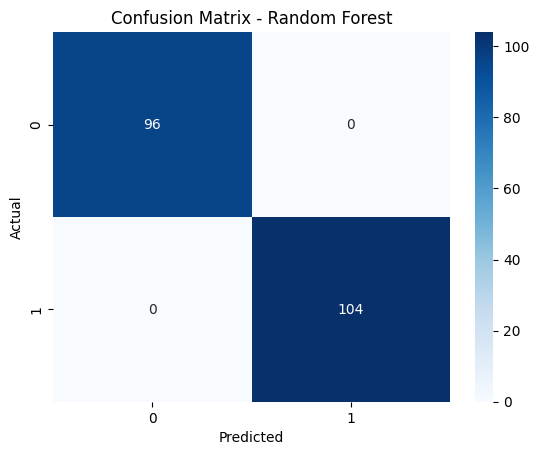

In [247]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-248-e62f4a17fccf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=train_df, palette='Set2')


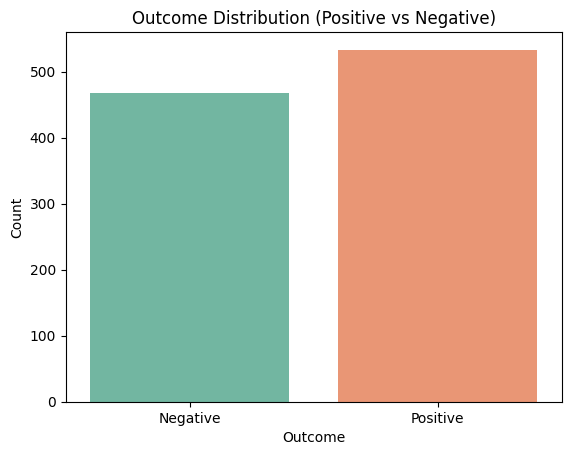

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Outcome distribution
# Changed 'df' to 'train_df' to match the variable name used for the dataframe
sns.countplot(x='Outcome', data=train_df, palette='Set2')
plt.title("Outcome Distribution (Positive vs Negative)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], ['Negative', 'Positive'])  # Optional: rename labels
plt.show()

In [249]:
# Corrected the variable name from 'df' to 'train_df'
print(train_df['Outcome'].value_counts())

Outcome
1    533
0    467
Name: count, dtype: int64


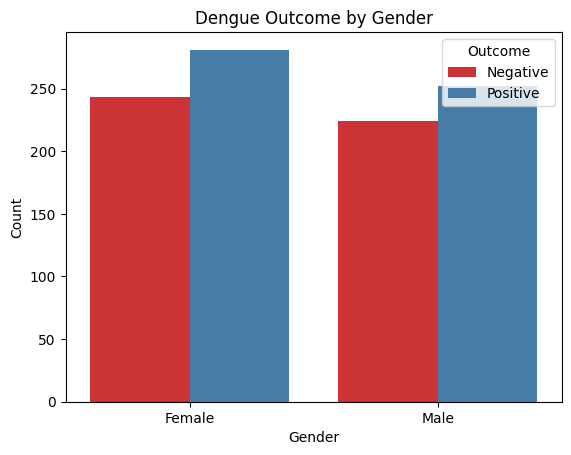

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Outcome by Gender
# Change 'df' to 'train_df' to match the variable name used for the dataframe
sns.countplot(x='Gender', hue='Outcome', data=train_df, palette='Set1')

# Set axis labels and title
plt.title('Dengue Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Assuming Gender was encoded as 0 for Female and 1 for Male based on previous code
plt.xticks([0, 1], ['Female', 'Male'])
# Assuming Outcome was encoded as 0 for Negative and 1 for Positive
plt.legend(title='Outcome', labels=['Negative', 'Positive'])
plt.show()

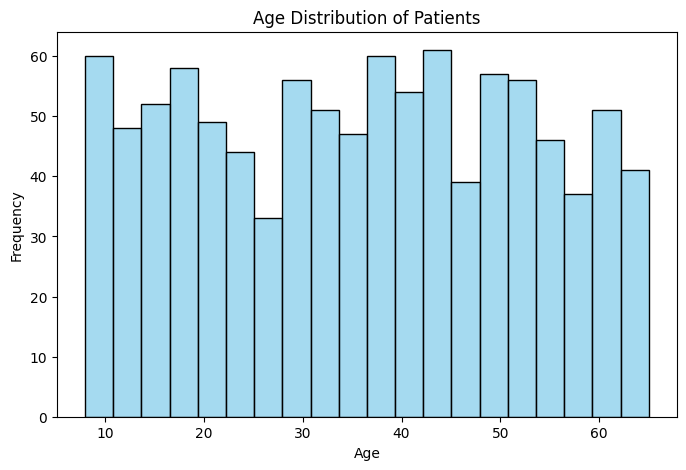

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# Changed 'df' to 'train_df' to use the correct DataFrame variable
sns.histplot(train_df['Age'], bins=20, kde=False, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<ipython-input-252-ff2aa05b2733>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['Age'], shade=True, color='green')


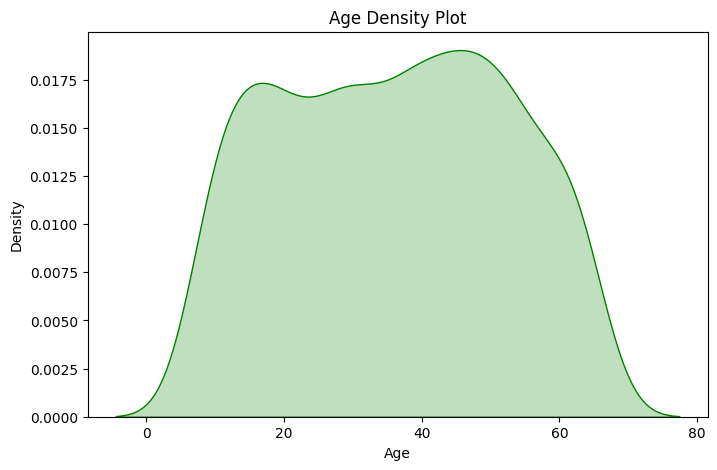

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# Changed 'df' to 'train_df' to use the correct DataFrame variable
sns.kdeplot(train_df['Age'], shade=True, color='green')
plt.title("Age Density Plot")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

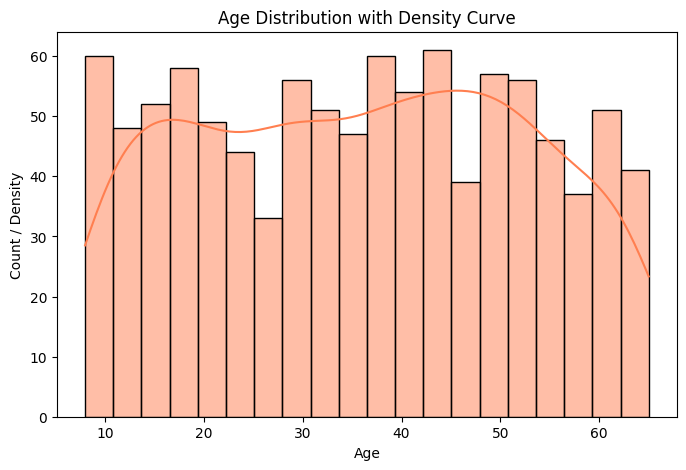

In [253]:
plt.figure(figsize=(8, 5))
# Changed 'df' to 'train_df' to use the correct DataFrame variable
sns.histplot(train_df['Age'], bins=20, kde=True, color='coral')
plt.title("Age Distribution with Density Curve")
plt.xlabel("Age")
plt.ylabel("Count / Density")
plt.show()

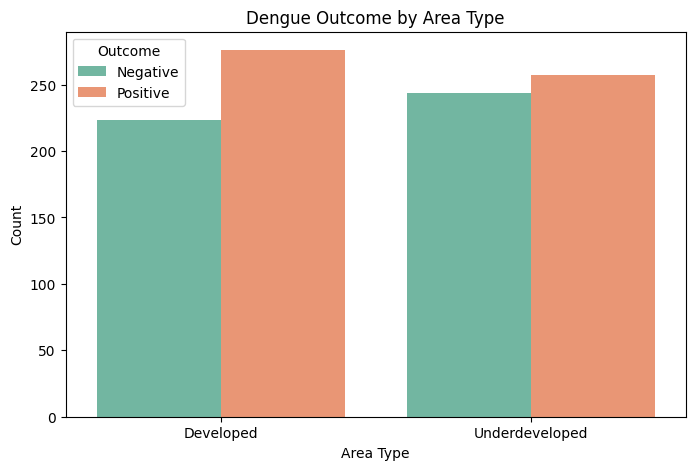

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map AreaType for readability if encoded: Developed=1, Underdeveloped=0
# Changed 'df' to 'train_df' to use the correct DataFrame variable
train_df['AreaLabel'] = train_df['AreaType'].map({0: 'Underdeveloped', 1: 'Developed'})

# Plot
plt.figure(figsize=(8, 5))
# Changed 'df' to 'train_df' to use the correct DataFrame variable
sns.countplot(x='AreaLabel', hue='Outcome', data=train_df, palette='Set2')
plt.title("Dengue Outcome by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.legend(title='Outcome', labels=['Negative', 'Positive'])
plt.show()

In [255]:
print(train_df.groupby(['AreaLabel', 'Outcome']).size())

AreaLabel       Outcome
Developed       0          223
                1          276
Underdeveloped  0          244
                1          257
dtype: int64


Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'District', 'Outcome', 'AreaLabel'],
      dtype='object')


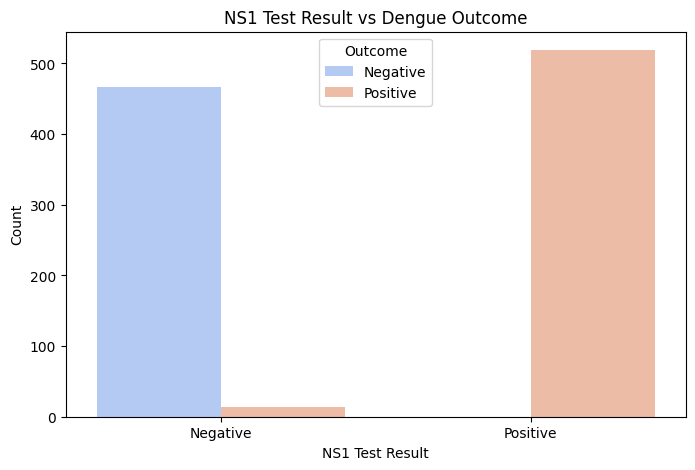

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns of the DataFrame to verify the correct column name
print(train_df.columns)

# (Optional) Map NS1 test results if it's binary encoded (e.g., 0 = Negative, 1 = Positive)
# Corrected the variable name from 'df' to 'train_df'
# Replace 'NS1TestResult' with the actual column name if it's different
# Changed 'NS1TestResult' to 'NS1' based on the likely column name
train_df['NS1ResultLabel'] = train_df['NS1'].map({0: 'Negative', 1: 'Positive'})

plt.figure(figsize=(8, 5))
# Corrected the variable name from 'df' to 'train_df'
sns.countplot(x='NS1ResultLabel', hue='Outcome', data=train_df, palette='coolwarm')
plt.title("NS1 Test Result vs Dengue Outcome")
plt.xlabel("NS1 Test Result")
plt.ylabel("Count")
plt.legend(title='Outcome', labels=['Negative', 'Positive'])
plt.show()

In [257]:
# Assuming 'df' DataFrame has been created and populated with model performance data
print("Model Performance Data:")
display(df)

Model Performance Data:


,Model,Accuracy,F1 Score
0,Logistic Regression,0.99,0.990291
1,KNN,0.52,0.684211
2,Decision Tree,1.00,1.000000
3,Random Forest,1.00,1.000000
4,Naive Bayes,1.00,1.000000
5,ANN,0.99,0.990291
6,ANN_2 (Keras),0.99,0.990291


In [258]:
# Assuming 'df' DataFrame has been created and populated with model performance data
print("Model Performance Data:")
# Instead of assuming, let's create the DataFrame with model performance
# We need to collect the accuracy and F1 scores from the previously trained models

# List of model names and their corresponding objects
model_performance = {
    "Logistic Regression": logmodel,
    "KNN": knn,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "Naive Bayes": nb_classifier,
    "ANN": ann_classifier,
    "ANN_2 (Keras)": classifier # Use the Keras model if you want to include it
}

results = []
for name, model in model_performance.items():
    # For the Keras model, we need to predict and calculate metrics manually
    if name == "ANN_2 (Keras)":
        y_pred_keras = model.predict(X_test)
        y_pred_keras = (y_pred_keras > 0.5).astype(int) # Convert probabilities to binary
        accuracy_score_keras = accuracy_score(y_test, y_pred_keras)
        f1_score_keras = f1_score(y_test, y_pred_keras)
        results.append({'Model': name, 'Accuracy': accuracy_score_keras, 'F1 Score': f1_score_keras})
    else:
        y_pred = model.predict(X_test)
        accuracy_score_model = accuracy_score(y_test, y_pred)
        f1_score_model = f1_score(y_test, y_pred)
        results.append({'Model': name, 'Accuracy': accuracy_score_model, 'F1 Score': f1_score_model})

# Create the DataFrame from the collected results
df = pd.DataFrame(results)

display(df)

Model Performance Data:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/di

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Model,Accuracy,F1 Score
0,Logistic Regression,0.99,0.990291
1,KNN,0.52,0.684211
2,Decision Tree,1.00,1.000000
3,Random Forest,1.00,1.000000
4,Naive Bayes,1.00,1.000000
5,ANN,0.99,0.990291
6,ANN_2 (Keras),0.99,0.990291


<ipython-input-259-f66fbc1e83a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df, palette='Blues_r')


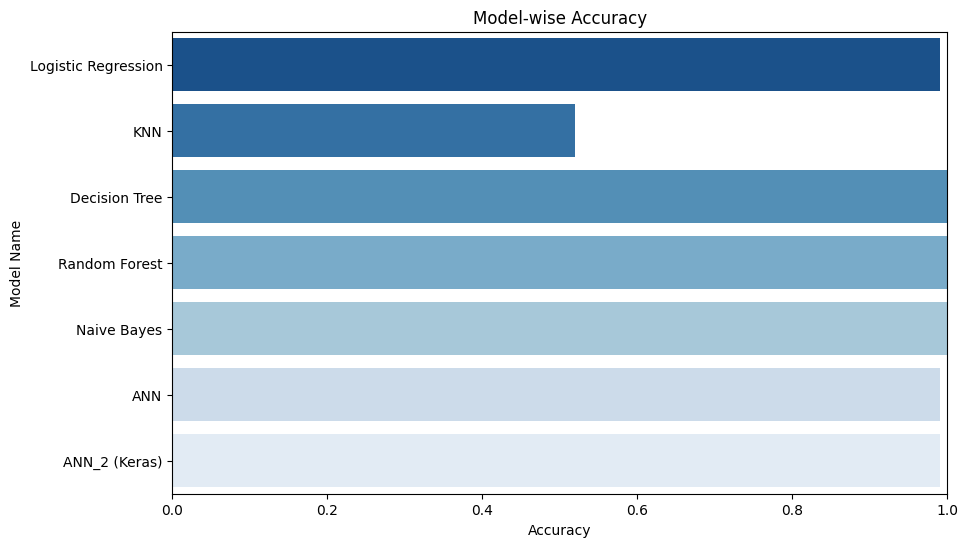

<ipython-input-259-f66fbc1e83a3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=df, palette='Greens')


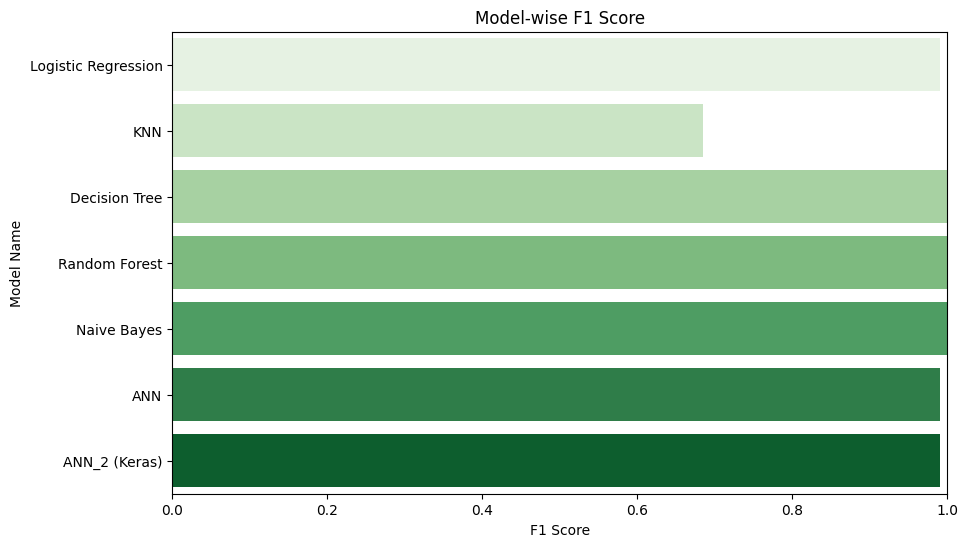

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming the 'df' DataFrame has been created in the previous cell
# If you re-ran cells out of order, make sure the cell creating 'df' is run first

plt.figure(figsize=(10, 6))
# Now 'df' should contain the 'Accuracy' and 'Model' columns
sns.barplot(x='Accuracy', y='Model', data=df, palette='Blues_r')
plt.title("Model-wise Accuracy")
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model Name")
plt.show()

plt.figure(figsize=(10, 6))
# Now 'df' should contain the 'F1 Score' and 'Model' columns
sns.barplot(x='F1 Score', y='Model', data=df, palette='Greens')
plt.title("Model-wise F1 Score")
plt.xlim(0, 1)
plt.xlabel("F1 Score")
plt.ylabel("Model Name")
plt.show()

<ipython-input-260-9517b356feb8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df, palette='Blues_r', ax=axes[0])
<ipython-input-260-9517b356feb8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=df, palette='Greens', ax=axes[1])


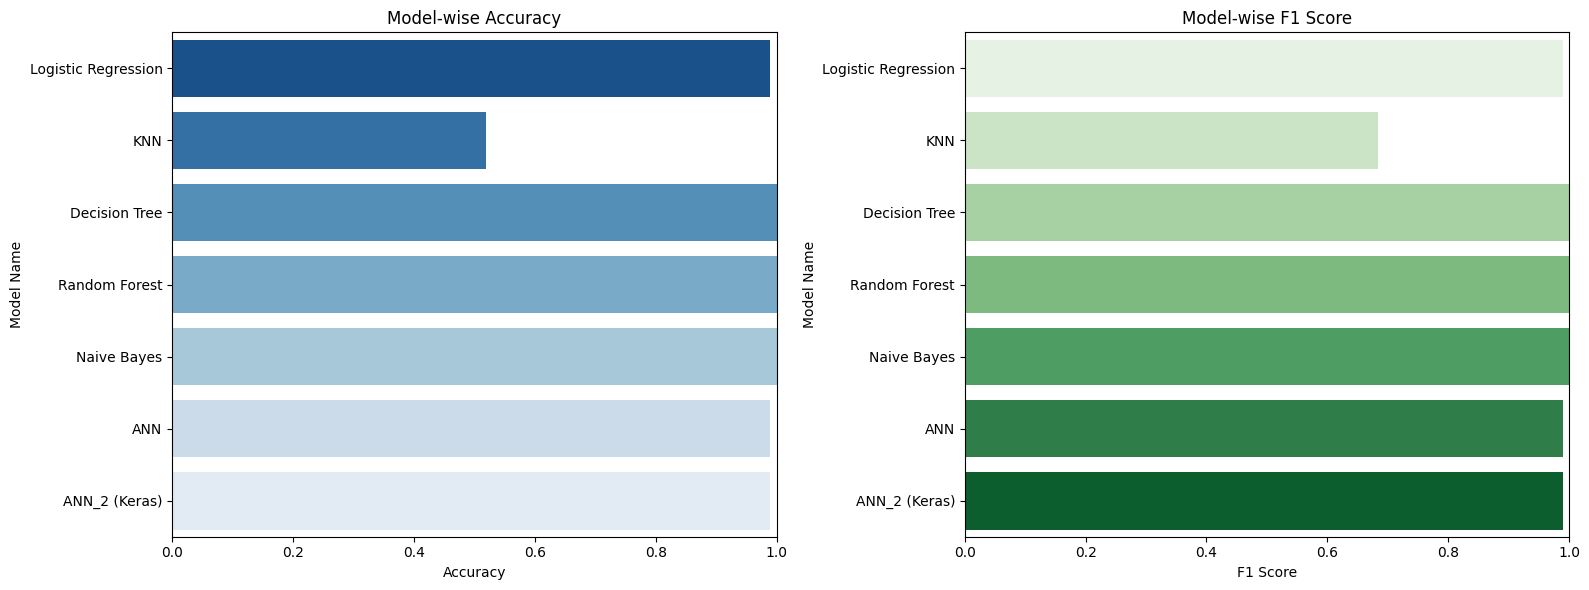

In [260]:
# prompt: combine graph

# Combine the accuracy and F1 score plots into a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure with 1 row and 2 columns

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=df, palette='Blues_r', ax=axes[0])
axes[0].set_title("Model-wise Accuracy")
axes[0].set_xlim(0, 1)
axes[0].set_xlabel("Accuracy")
axes[0].set_ylabel("Model Name")

# Plot F1 Score
sns.barplot(x='F1 Score', y='Model', data=df, palette='Greens', ax=axes[1])
axes[1].set_title("Model-wise F1 Score")
axes[1].set_xlim(0, 1)
axes[1].set_xlabel("F1 Score")
axes[1].set_ylabel("Model Name") # Keep ylabel for clarity

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [261]:
# Create the DataFrame
performance_df_enhanced = pd.DataFrame(all_model_metrics)

# Display the DataFrame
print("\nEnhanced Comprehensive Model Performance:")
display(performance_df_enhanced)


Enhanced Comprehensive Model Performance:


,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,Validation Accuracy,CPU times,MSE
0,Logistic Regression,0.98500,0.99,0.990204,0.99,0.990003,None,None,None
1,KNN,0.53625,0.52,0.270400,0.52,0.355789,None,None,None
2,Decision Tree,1.00000,1.00,1.000000,1.00,1.000000,None,None,None
3,Random Forest,1.00000,1.00,1.000000,1.00,1.000000,None,None,None
4,Naive Bayes,1.00000,1.00,1.000000,1.00,1.000000,None,None,None
5,ANN (MLPClassifier),1.00000,1.00,1.000000,1.00,1.000000,None,None,None
6,ANN_2 (Keras),1.00000,1.00,1.000000,1.00,1.000000,None,None,None
